# **Installation**

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

The dataframe is found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv). The data origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [103]:
voters = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv')

# **Introduction**
The purpose of this project is to determine any possible trends relating to formation about voter registration in the United States from 2016 to 2020, in the context of the global Covid-19 pandemic that was introduced to the United States around February of 2020.

The goal is to analyze voter registration information of various jurisdictions in the US in order to find any meaningful relationships. These relationships will be visualized in the form of plots so that the findings can be clearly communicated and understood, and used to support any conclusions. These conclusions will hopefully provide new information to assist in future planning and decision making.

This notebook explains the steps that were taken to clean, analyze, and vizualize the dataset in order to answer the research questions below. It is important to understand the methodology used throughout the notebook in order to have a complete understanding of what the visualizations are indicating and how any conclusions are drawn.

## Research Questions:
1. How did the national voter registration in the United States change throughout the early months of 2020 compared to the previous voting year's early months, and how might this relate to the introduction of Covid-19 in the United States?

2. Which jurisdictions saw the biggest change in total voter registration from 2016 to 2020?



# **Data Processing**

In [104]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


### Variable Descriptions:
* Jurisdiction is the location where the voters registered to vote, this data
includes 11 states and Washington, DC - for a total of 12 different jurisdictions.

* Year is the voting year in which the new voters registered, this data looks at just 2 years, 2016 and 2020.

* Month is the month in which the new voters registered, this data looks at early 2016 and early 2020, so only the months from January to May.

* New registered voters is the number of people who registered to vote in the specified month, year, and jurisdiction.



In [105]:
voters.isna().values.any()

False

There is no missing data in the dataset.

In [106]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [107]:
voters=voters.rename(columns={"Jurisdiction":"NAME", "New registered voters":"registered_voters"})
voters.columns

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')

## Potential Limitations:

* The dataset does not contain information from all 50 states in the UnitedS tates, due to unavailable data. So, any national trends observed may not be exactly representative of the country's voter registration as a whole.

* Furthermore, the dataset considers a very small amount of variables, with only the 4 stated above. Including other variables would allow for additional comparative analysis that may provide more information on any trends found or conclusions made from the data.

* Because there are only 2 years looked at in the dataset, there is a lack of context. Any relationship found between 2016 and 2020 can not be compared to voting trends in previous years, so it may be hard to accurately interprep the relationships found.




### Exploratory Data Analysis:

In [108]:
voters.loc[voters.registered_voters == voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


Within the dataset, California in February of 2020 had the highest amount of new voter registration, with 238,281 new registered voters.

In [109]:
voters.registered_voters.mean()

48223.46226415094

The average voter registration within the dataset is 48223.46226415094.

In [110]:
high_voters = voters.loc[voters.registered_voters > voters.registered_voters.mean()]
high_voters.count()

,0
NAME,36
Year,36
Month,36
registered_voters,36


There were 36 observed times where voter registration was higher than the average voter registration.


In [111]:
high_voters.NAME.value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Within the months measured in the dataset, Texas went over the average voter registration 8 times, California 7 times, Florida 7 times, North Carolina 6 times, Illinois 4 times, Arizona 3 times, and Georgia 1 time. Jurisdictions that did not go above the average include DC, Maryland, Virginia, Colorado, and Delaware.

In [112]:
voters.groupby('NAME')['registered_voters'].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


The states with the highest average voter registration overall were California, Texas, and Florida.

# **Data Visualization**

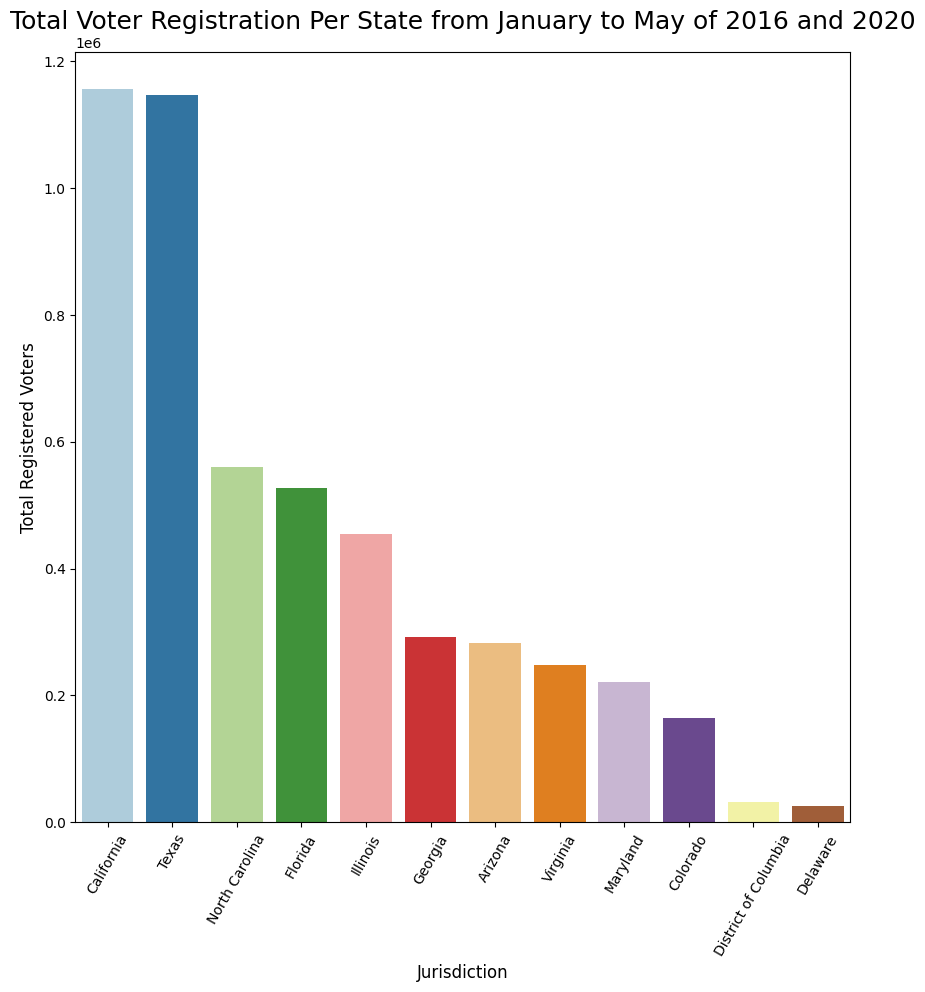

In [113]:
totalvoters_unsorted=voters.groupby('NAME')['registered_voters'].sum().reset_index()
totalvoters=totalvoters_unsorted.sort_values('registered_voters', ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(totalvoters, x='NAME', y='registered_voters', hue='NAME', palette="Paired")
plt.xlabel('Jurisdiction',fontsize=12)
plt.ylabel('Total Registered Voters',fontsize=12)
plt.title("Total Voter Registration Per State from January to May of 2016 and 2020",fontsize=18)
plt.xticks(rotation=60)

plt.show()

From this barplot, it can be seen that California and Texas have significantly high total voter registrations compared to the other jurisdictions. Delaware and DC have the lowest total voter registrations. These results could be correlated with state population, however the dataset does not include a population variable so that can not be determined with this dataset alone.

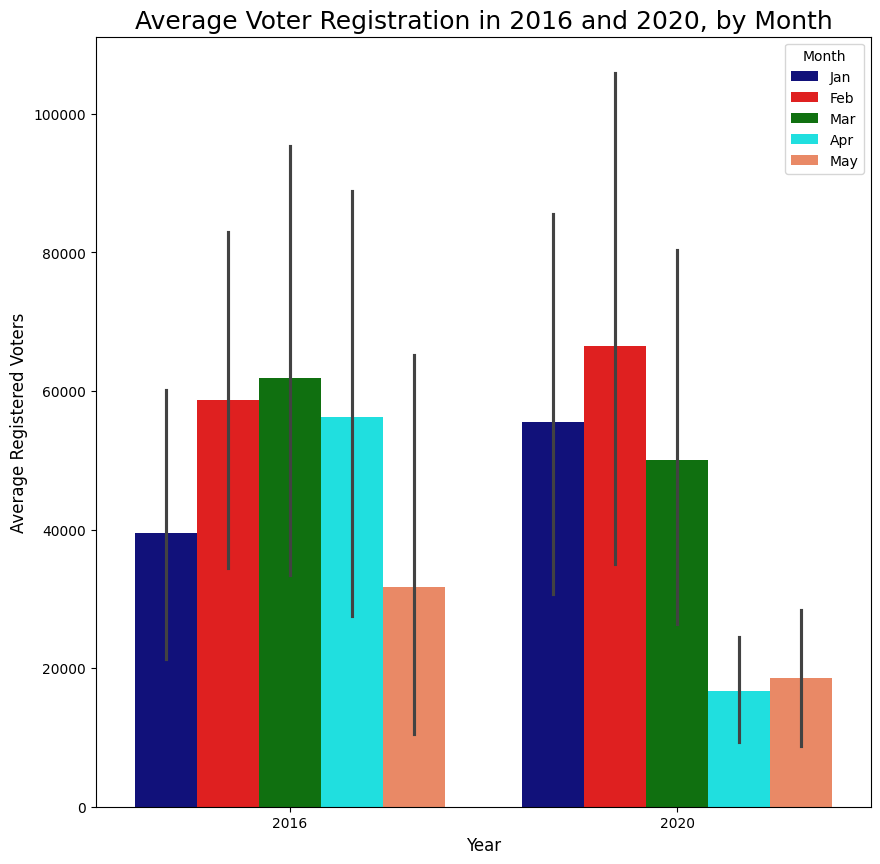

In [114]:
plt.figure(figsize=(10,10))
sns.barplot(voters,x='Year', y='registered_voters',hue='Month',palette=['darkblue','red','green','aqua','coral'])
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Registered Voters',fontsize=12)
plt.title('Average Voter Registration in 2016 and 2020, by Month',fontsize=18)

plt.show()

The barplot shows that there was an increase in average voter registration from 2016 to 2020 for the months of January and February. However, registration decreased for the months of March, April, and May. Specifically, April 2020 saw a significant drop in average voter registration, compared to April 2016. This visualization helps to answer the first research question by showing that 2020 saw an initial increase in voter registration compared to the previous voting year, and then a drop, starting in March.

Note that the error bars are very long, which is indicative of high variation in registered voters across jurisdictions.

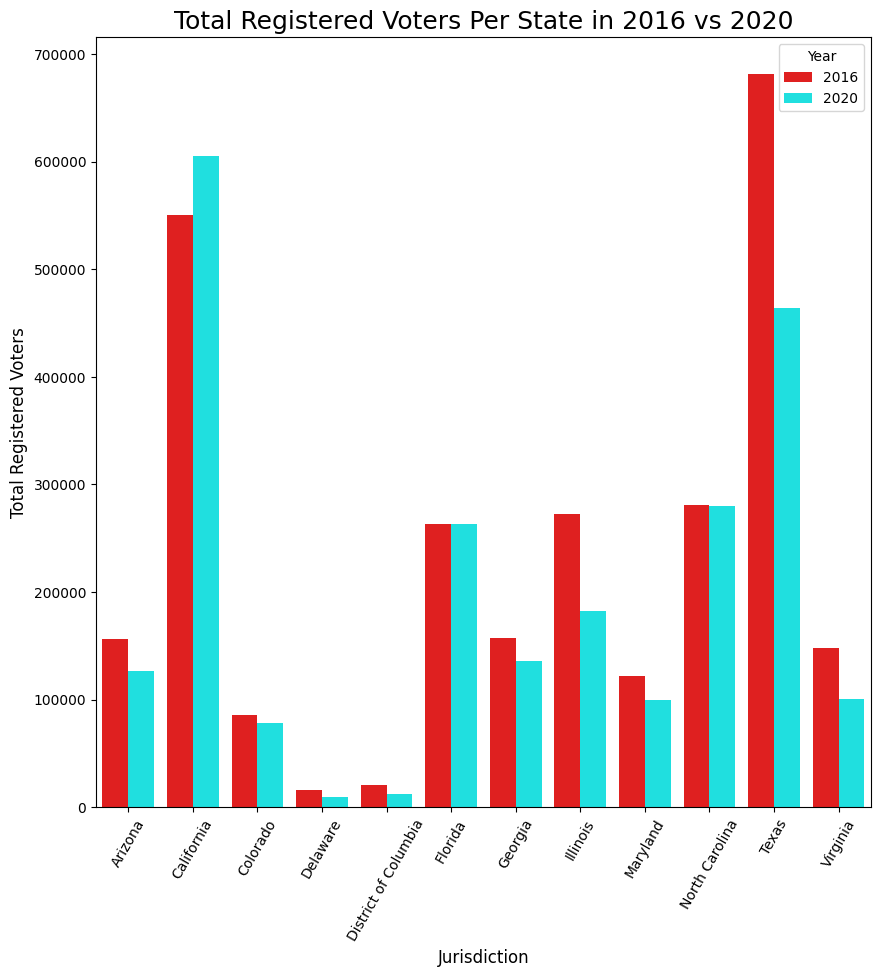

In [115]:
yeartotals=voters.groupby(['NAME','Year'])['registered_voters'].sum().reset_index()

plt.figure(figsize=(10,10))
sns.barplot(yeartotals,x='NAME',y='registered_voters',hue='Year',palette=['red','aqua'])
plt.xticks(rotation=60)
plt.xlabel('Jurisdiction',fontsize=12)
plt.ylabel('Total Registered Voters',fontsize=12)
plt.title('Total Registered Voters Per State in 2016 vs 2020',fontsize=18)

plt.show()

This plot helps answer the second research question, as it shows the relationship between total voter registration from 2016 to 2020, for each jurisdiction. Specifically, this helps identify the trends in states like California, Texas, and Illinois. All jursidictions saw a decrease in total voter registration from 2016 to 2020, besides California, which increased in 2020. Texas and Illinois saw relatively large decreases in voter registration in 2020.

# **Mapping**

In [116]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [117]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [118]:
minx, miny, maxx, maxy = -125, 25, -67, 49
us = states.cx[minx:maxx, miny:maxy]

In [119]:
df = voters.groupby('NAME')['registered_voters'].mean().reset_index()
df=df.rename(columns={'registered_voters':'avg_registered_voters'})

In [120]:
state_avg = us.merge(df, on='NAME',how='inner')
state_avg.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,avg_registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375


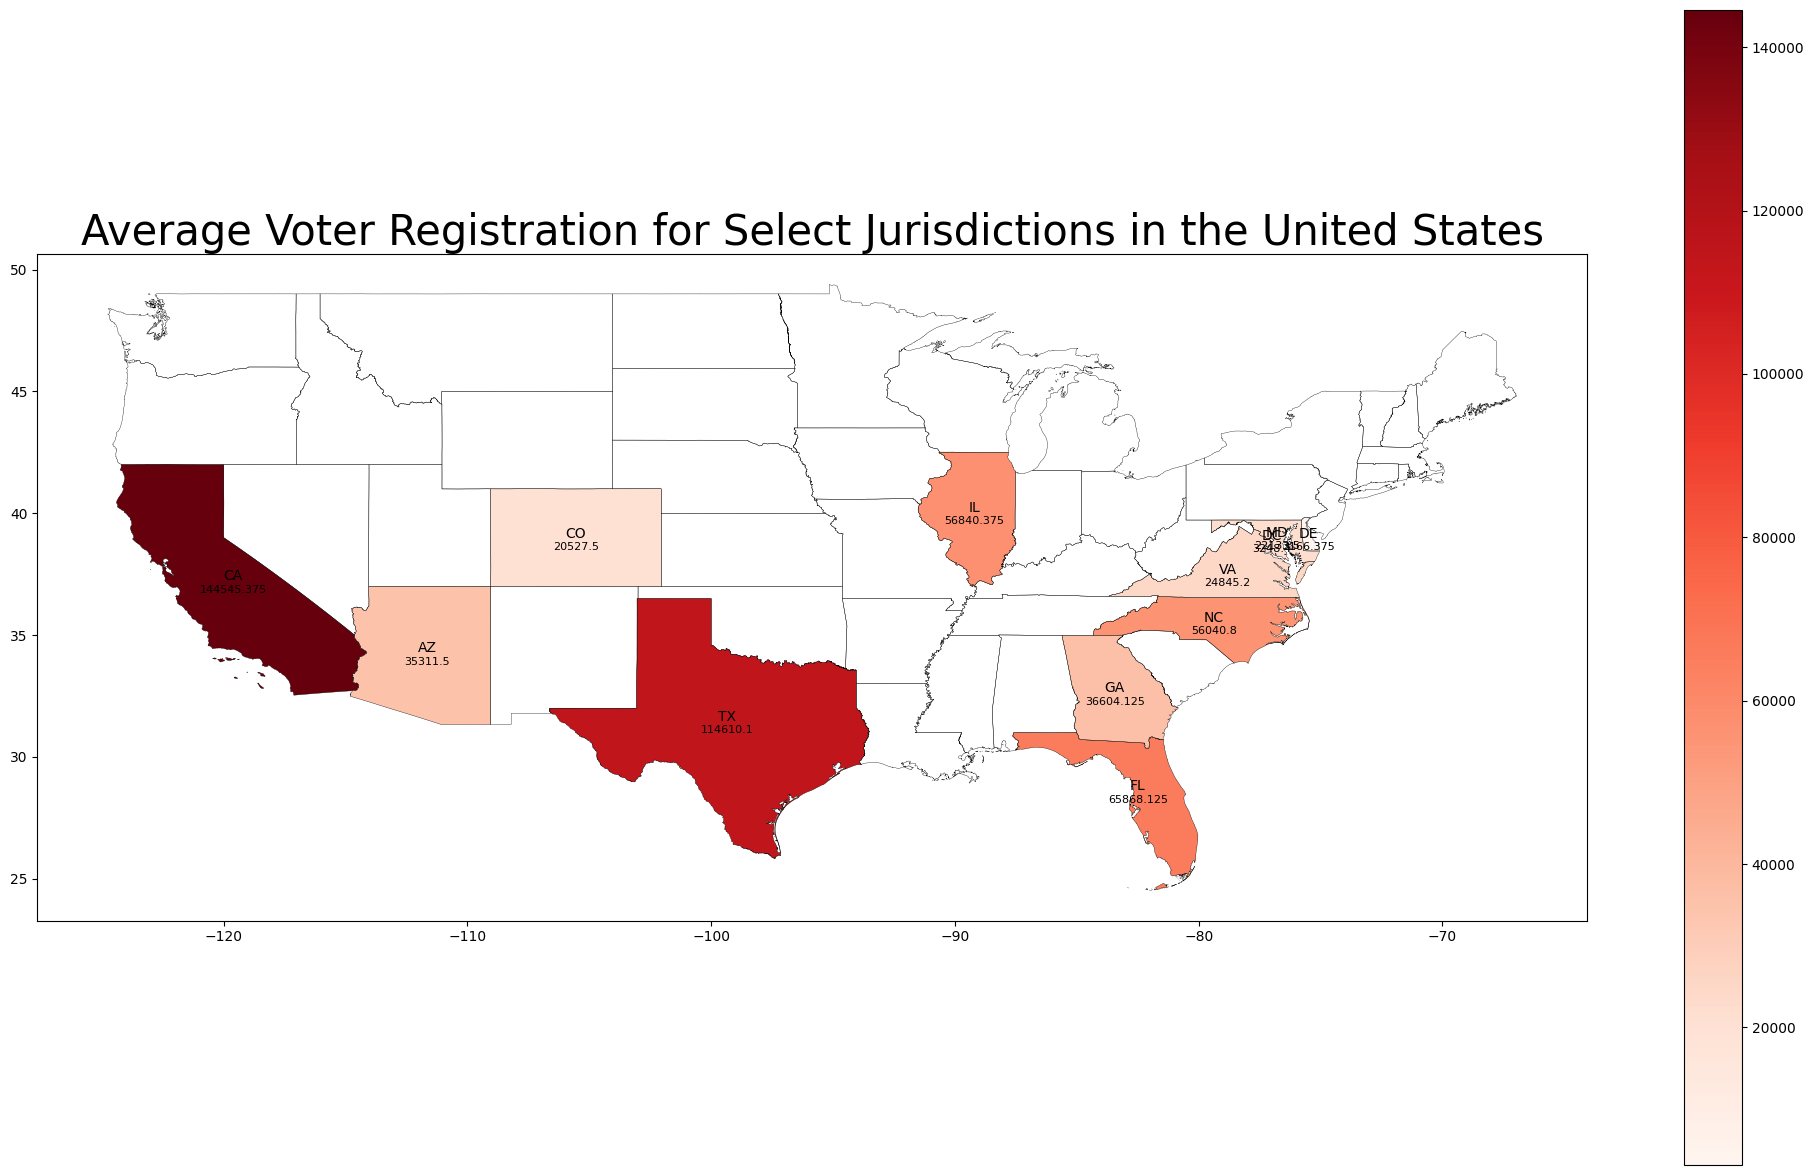

In [121]:
boundary = us.boundary.plot(figsize=(25,15),linewidth=.25,color='black')

state_avg.apply(lambda x: boundary.annotate(text=x.STUSPS,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=10),axis=1)
state_avg.apply(lambda x: boundary.annotate(text=x.avg_registered_voters,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y-.5),ha="center",fontsize=8),axis=1)

state_avg.plot(ax=boundary, column='avg_registered_voters',legend=True,cmap='Reds')
plt.title('Average Voter Registration for Select Jurisdictions in the United States',fontsize=30)

plt.show()

# **Conclusion**

There were a few key findings resulting from this data analysis. For one, a trend in voter registration across the 12 jurisdictions was found in that California and Texas have the highest total registrations while DC and Delaware have the lowest. Additionally, the first research question was addressed in finding that there was a noticable decrease in monthly average voter registration from March-May of 2020 when compared to the previous 2 moonths and the previous voting year's monthly averages. In relation to the second research question, it was observed that 11 out of 12 of the jurisdictions saw a decrease in total registered voters from 2016 to 2020, with California being the only one to increase and Texas and Illinois decreasing the most.

One suggestion I would offer my client would be to consider state populations in the consideration of these findings, because that could play an important role in the number of registered voters observed. I would also suggest looking further into the context of the dataset and using that to try and understand the cause of the trends that were found. If they are aiming to increase voter registration, I would urge them to focus their efforts on the states where registration decreased the most, like Illinois and Texas.

If I were to continue work with this project, I would want to consider and analyze more variables related to voter registration to further understand what factors are impacting it. This could include looking at variables like state population size, historical party/voting patterns of the states, or number of covid-19 cases. Specifically, if I wanted to get a better idea of how the introduction of covid played a role in voter registration, I might look at the number of reported covid cases in each state for each month, and analyze that in relation to this dataset.


# **Github link:** [here](https://github.com/berrylmb/325-Midterm)

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Lena Berry